In [116]:
import string
import pandas as pd
import numpy as np

In [117]:
data = pd.read_csv('TAScrape.csv', sep=',', encoding='latin1')
data.head(20)

,Ulasan
0,sesuai gambar bagus
1,barang sesuai pesanan dan bermanfaat
2,"toko amanah, hp sesuai deskripsi"
3,Alhamdulillah tablet pengganti sdh datang di c...
4,Pengiriman cepat..\nUntuk barang berfungsi den...
5,"4 kali coba beli hp dan tablet online, ngk per..."
6,"Cek out rabu, minggu pagi dah smp. Sdh dipakai..."
7,ga bisa buat akun kecewa
8,Hanya tools menu yg diatas kaya wifi..klo pas ...
9,Barang ok â¦..mantabz


In [125]:
# proses case folding 
def casefolding(UlasanCase):
    UlasanCase = UlasanCase.lower()
    return UlasanCase
data['UlasanCase'] = data['Ulasan'].apply(casefolding)
data.head(20)

,Ulasan,UlasanNormal,UlasanStop,UlasanCase
0,sesuai gambar bagus,"[sesuai, gambar, bagus]","[sesuai, gambar, bagus]",sesuai gambar bagus
1,barang sesuai pesanan dan bermanfaat,"[barang, sesuai, pesanan, dan, bermanfaat]","[barang, sesuai, pesanan, bermanfaat]",barang sesuai pesanan dan bermanfaat
2,"toko amanah, hp sesuai deskripsi","[toko, amanah, hp, sesuai, deskripsi]","[toko, amanah, hp, sesuai, deskripsi]","toko amanah, hp sesuai deskripsi"
3,Alhamdulillah tablet pengganti sdh datang di c...,"[alhamdulillah, tablet, pengganti, sudah, data...","[alhamdulillah, tablet, pengganti, cek, bagus,...",alhamdulillah tablet pengganti sdh datang di c...
4,Pengiriman cepat..\nUntuk barang berfungsi den...,"[pengiriman, cepat, untuk, barang, berfungsi, ...","[pengiriman, cepat, barang, berfungsi, warna, ...",pengiriman cepat..\nuntuk barang berfungsi den...
5,"4 kali coba beli hp dan tablet online, ngk per...","[kali, coba, beli, hp, dan, tablet, online, ng...","[kali, coba, beli, hp, tablet, online, ngk, be...","4 kali coba beli hp dan tablet online, ngk per..."
6,"Cek out rabu, minggu pagi dah smp. Sdh dipakai...","[cek, out, rabu, minggu, pagi, dah, sampai, su...","[cek, out, rabu, minggu, pagi, dah, dipakai, b...","cek out rabu, minggu pagi dah smp. sdh dipakai..."
7,ga bisa buat akun kecewa,"[tidak, bisa, buat, akun, kecewa]","[akun, kecewa]",ga bisa buat akun kecewa
8,Hanya tools menu yg diatas kaya wifi..klo pas ...,"[hanya, tools, menu, yang, diatas, kaya, wifik...","[tools, menu, diatas, kaya, wifiklo, pas, teke...",hanya tools menu yg diatas kaya wifi..klo pas ...
9,Barang ok â¦..mantabz,"[barang, ok, â¦mantabz]","[barang, ok, â¦mantabz]",barang ok â¦..mantabz


In [126]:
# proses cleansing remove regex seperti tanda baca dan angka angka
import re
import string
def cleansing(UlasanClean):
    UlasanClean = UlasanClean.strip(" ")
    UlasanClean = re.sub(r'[?|$|.|!_:")(-+,]', '', UlasanClean)
    UlasanClean = re.sub(r'\d+', '', UlasanClean)
    UlasanClean = re.sub(r"\b[a-zA-Z]\b", "", UlasanClean)
    UlasanClean = re.sub('\s+',' ', UlasanClean)
    return UlasanClean
data['UlasanClean'] = data['UlasanCase'].apply(cleansing)
data.head(10)

,Ulasan,UlasanNormal,UlasanStop,UlasanCase,UlasanClean
0,sesuai gambar bagus,"[sesuai, gambar, bagus]","[sesuai, gambar, bagus]",sesuai gambar bagus,sesuai gambar bagus
1,barang sesuai pesanan dan bermanfaat,"[barang, sesuai, pesanan, dan, bermanfaat]","[barang, sesuai, pesanan, bermanfaat]",barang sesuai pesanan dan bermanfaat,barang sesuai pesanan dan bermanfaat
2,"toko amanah, hp sesuai deskripsi","[toko, amanah, hp, sesuai, deskripsi]","[toko, amanah, hp, sesuai, deskripsi]","toko amanah, hp sesuai deskripsi",toko amanah hp sesuai deskripsi
3,Alhamdulillah tablet pengganti sdh datang di c...,"[alhamdulillah, tablet, pengganti, sudah, data...","[alhamdulillah, tablet, pengganti, cek, bagus,...",alhamdulillah tablet pengganti sdh datang di c...,alhamdulillah tablet pengganti sdh datang di c...
4,Pengiriman cepat..\nUntuk barang berfungsi den...,"[pengiriman, cepat, untuk, barang, berfungsi, ...","[pengiriman, cepat, barang, berfungsi, warna, ...",pengiriman cepat..\nuntuk barang berfungsi den...,pengiriman cepat untuk barang berfungsi dengan...
5,"4 kali coba beli hp dan tablet online, ngk per...","[kali, coba, beli, hp, dan, tablet, online, ng...","[kali, coba, beli, hp, tablet, online, ngk, be...","4 kali coba beli hp dan tablet online, ngk per...",kali coba beli hp dan tablet online ngk perna...
6,"Cek out rabu, minggu pagi dah smp. Sdh dipakai...","[cek, out, rabu, minggu, pagi, dah, sampai, su...","[cek, out, rabu, minggu, pagi, dah, dipakai, b...","cek out rabu, minggu pagi dah smp. sdh dipakai...",cek out rabu minggu pagi dah smp sdh dipakai b...
7,ga bisa buat akun kecewa,"[tidak, bisa, buat, akun, kecewa]","[akun, kecewa]",ga bisa buat akun kecewa,ga bisa buat akun kecewa
8,Hanya tools menu yg diatas kaya wifi..klo pas ...,"[hanya, tools, menu, yang, diatas, kaya, wifik...","[tools, menu, diatas, kaya, wifiklo, pas, teke...",hanya tools menu yg diatas kaya wifi..klo pas ...,hanya tools menu yg diatas kaya wifiklo pas te...
9,Barang ok â¦..mantabz,"[barang, ok, â¦mantabz]","[barang, ok, â¦mantabz]",barang ok â¦..mantabz,barang ok â¦mantabz


In [127]:
#tokenizing
from nltk.tokenize import word_tokenize
def word_tokenize_wrapper(text):
 return word_tokenize(text)
data['UlasanToken'] = data['UlasanClean'].apply(word_tokenize_wrapper)
data.pop('UlasanCase')
data.head()

,Ulasan,UlasanNormal,UlasanStop,UlasanClean,UlasanToken
0,sesuai gambar bagus,"[sesuai, gambar, bagus]","[sesuai, gambar, bagus]",sesuai gambar bagus,"[sesuai, gambar, bagus]"
1,barang sesuai pesanan dan bermanfaat,"[barang, sesuai, pesanan, dan, bermanfaat]","[barang, sesuai, pesanan, bermanfaat]",barang sesuai pesanan dan bermanfaat,"[barang, sesuai, pesanan, dan, bermanfaat]"
2,"toko amanah, hp sesuai deskripsi","[toko, amanah, hp, sesuai, deskripsi]","[toko, amanah, hp, sesuai, deskripsi]",toko amanah hp sesuai deskripsi,"[toko, amanah, hp, sesuai, deskripsi]"
3,Alhamdulillah tablet pengganti sdh datang di c...,"[alhamdulillah, tablet, pengganti, sudah, data...","[alhamdulillah, tablet, pengganti, cek, bagus,...",alhamdulillah tablet pengganti sdh datang di c...,"[alhamdulillah, tablet, pengganti, sdh, datang..."
4,Pengiriman cepat..\nUntuk barang berfungsi den...,"[pengiriman, cepat, untuk, barang, berfungsi, ...","[pengiriman, cepat, barang, berfungsi, warna, ...",pengiriman cepat untuk barang berfungsi dengan...,"[pengiriman, cepat, untuk, barang, berfungsi, ..."


In [128]:
#normalisasi
normalizad_word = pd.read_csv("C:/Users/LENOVO/Documents/normalisasi.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

data['UlasanNormal'] = data['UlasanToken'].apply(normalized_term)
data.pop('UlasanClean')
data.head(7)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11204\2547014676.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalizad_word_dict:
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11204\2547014676.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalizad_word_dict[row[0]] = row[1]


,Ulasan,UlasanNormal,UlasanStop,UlasanToken
0,sesuai gambar bagus,"[sesuai, gambar, bagus]","[sesuai, gambar, bagus]","[sesuai, gambar, bagus]"
1,barang sesuai pesanan dan bermanfaat,"[barang, sesuai, pesanan, dan, bermanfaat]","[barang, sesuai, pesanan, bermanfaat]","[barang, sesuai, pesanan, dan, bermanfaat]"
2,"toko amanah, hp sesuai deskripsi","[toko, amanah, hp, sesuai, deskripsi]","[toko, amanah, hp, sesuai, deskripsi]","[toko, amanah, hp, sesuai, deskripsi]"
3,Alhamdulillah tablet pengganti sdh datang di c...,"[alhamdulillah, tablet, pengganti, sudah, data...","[alhamdulillah, tablet, pengganti, cek, bagus,...","[alhamdulillah, tablet, pengganti, sdh, datang..."
4,Pengiriman cepat..\nUntuk barang berfungsi den...,"[pengiriman, cepat, untuk, barang, berfungsi, ...","[pengiriman, cepat, barang, berfungsi, warna, ...","[pengiriman, cepat, untuk, barang, berfungsi, ..."
5,"4 kali coba beli hp dan tablet online, ngk per...","[kali, coba, beli, hp, dan, tablet, online, ng...","[kali, coba, beli, hp, tablet, online, ngk, be...","[kali, coba, beli, hp, dan, tablet, online, ng..."
6,"Cek out rabu, minggu pagi dah smp. Sdh dipakai...","[cek, out, rabu, minggu, pagi, dah, sampai, su...","[cek, out, rabu, minggu, pagi, dah, dipakai, b...","[cek, out, rabu, minggu, pagi, dah, smp, sdh, ..."


In [129]:
#stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = pd.read_csv("TAScrape.csv")
def stopword_removal(Review):
    filtering = stopwords.words('indonesian','english')
    filtering.extend(sw)
    x = []
    data = []
    def myFunc(x):
        if x in filtering:
            return False
        else:
            return True
    fit = filter(myFunc, Review)
    for x in fit:
        data.append(x)
    return data
data['UlasanStop'] = data['UlasanNormal'].apply(stopword_removal)
data.pop('UlasanToken')
data.pop('Ulasan')
data.head(7)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,UlasanNormal,UlasanStop
0,"[sesuai, gambar, bagus]","[sesuai, gambar, bagus]"
1,"[barang, sesuai, pesanan, dan, bermanfaat]","[barang, sesuai, pesanan, bermanfaat]"
2,"[toko, amanah, hp, sesuai, deskripsi]","[toko, amanah, hp, sesuai, deskripsi]"
3,"[alhamdulillah, tablet, pengganti, sudah, data...","[alhamdulillah, tablet, pengganti, cek, bagus,..."
4,"[pengiriman, cepat, untuk, barang, berfungsi, ...","[pengiriman, cepat, barang, berfungsi, warna, ..."
5,"[kali, coba, beli, hp, dan, tablet, online, ng...","[kali, coba, beli, hp, tablet, online, ngk, be..."
6,"[cek, out, rabu, minggu, pagi, dah, sampai, su...","[cek, out, rabu, minggu, pagi, dah, dipakai, b..."


In [130]:
#Stemming
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(Review):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in Review:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean=" ".join(do)
    print(d_clean)
    return d_clean
data['UlasanStem'] = data['UlasanNormal'].apply(stemming)

data.to_csv('TAClean.csv', index=False)
data_clean = pd.read_csv('TAClean.csv', encoding='latin1')
data_clean.head()

sesuai gambar bagus
barang sesuai pesan dan manfaat
toko amanah hp sesuai deskripsi
alhamdulillah tablet ganti sudah datang di cek bagus semua terima kasih atas respon cepat dan layan garansi
kirim cepat untuk barang fungsi dengan baik cuma warna tidak sesuai pilih request putih dikiirm biru dan ada baret sedikit di layar tetapi cara overall
kali coba beli hp dan tablet online ngk pernah untung batere ngedrop lahlayar eror lah sudah mulai tobat beli online murah nyata murah saran saya buat reka
cek out rabu minggu pagi dah sampai sudah pakai barang bagus
tidak bisa buat akun kecewa
hanya tools menu yang atas kaya wifiklo pas teken tidak tuju atur lebih oke sii
barang ok mantabz
respon jual baikkualitas tab standar
aspal
lumayan
barang sesuai pesan terimakasuh
jelas barang china zonk tetapi harga macam barang ori
kirim cepat dan barang terima dengan aman 
terima kasih seller barang sudah terima dengan baik tidak lecet sedikit dan masih segel aman terima kasih juga  sudah antar paket say

,UlasanNormal,UlasanStop,UlasanStem
0,"['sesuai', 'gambar', 'bagus']","['sesuai', 'gambar', 'bagus']",sesuai gambar bagus
1,"['barang', 'sesuai', 'pesanan', 'dan', 'berman...","['barang', 'sesuai', 'pesanan', 'bermanfaat']",barang sesuai pesan dan manfaat
2,"['toko', 'amanah', 'hp', 'sesuai', 'deskripsi']","['toko', 'amanah', 'hp', 'sesuai', 'deskripsi']",toko amanah hp sesuai deskripsi
3,"['alhamdulillah', 'tablet', 'pengganti', 'suda...","['alhamdulillah', 'tablet', 'pengganti', 'cek'...",alhamdulillah tablet ganti sudah datang di cek...
4,"['pengiriman', 'cepat', 'untuk', 'barang', 'be...","['pengiriman', 'cepat', 'barang', 'berfungsi',...",kirim cepat untuk barang fungsi dengan baik cu...


In [133]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import re

data_clean = pd.read_csv('TAClean.csv', encoding='latin1')
data_clean.head()

,UlasanNormal,UlasanStop,UlasanStem
0,"['sesuai', 'gambar', 'bagus']","['sesuai', 'gambar', 'bagus']",sesuai gambar bagus
1,"['barang', 'sesuai', 'pesanan', 'dan', 'berman...","['barang', 'sesuai', 'pesanan', 'bermanfaat']",barang sesuai pesan dan manfaat
2,"['toko', 'amanah', 'hp', 'sesuai', 'deskripsi']","['toko', 'amanah', 'hp', 'sesuai', 'deskripsi']",toko amanah hp sesuai deskripsi
3,"['alhamdulillah', 'tablet', 'pengganti', 'suda...","['alhamdulillah', 'tablet', 'pengganti', 'cek'...",alhamdulillah tablet ganti sudah datang di cek...
4,"['pengiriman', 'cepat', 'untuk', 'barang', 'be...","['pengiriman', 'cepat', 'barang', 'berfungsi',...",kirim cepat untuk barang fungsi dengan baik cu...


In [134]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_clean['UlasanStem'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['UlasanStem'].astype('U'))
print(text_tf)

  (0, 82)	0.3983021020382117
  (0, 357)	0.8276608879952929
  (0, 984)	0.395389542090816
  (1, 634)	0.767901318227382
  (1, 247)	0.2641620412918253
  (1, 814)	0.41459730792691
  (1, 112)	0.25611095269351225
  (1, 984)	0.32103307240121787
  (2, 267)	0.565905537074033
  (2, 420)	0.40680710336270826
  (2, 39)	0.4684501818843028
  (2, 1123)	0.42871430474603134
  (2, 984)	0.3331927006422615
  (3, 362)	0.3343625753253999
  (3, 595)	0.2711253610844804
  (3, 213)	0.12835106838801258
  (3, 901)	0.25532155507380516
  (3, 69)	0.3343625753253999
  (3, 511)	0.1234863174046479
  (3, 1091)	0.11971246619573646
  (3, 973)	0.20699131455545586
  (3, 212)	0.32631916198305144
  (3, 269)	0.16954322689816903
  (3, 254)	0.2742150702557907
  (3, 1038)	0.1497554156324805
  :	:
  (660, 213)	0.15555705878158235
  (660, 511)	0.1496611487265968
  (660, 1091)	0.14508737149427256
  (660, 39)	0.2381881722833366
  (660, 1123)	0.43596813760827496
  (660, 247)	0.13940324887554922
  (661, 982)	0.24074720467486738
  (661, 3

In [135]:
#Cosine Similarity
# Import cosine_similarity metrics
from sklearn.metrics.pairwise import cosine_similarity
cos_sim=cosine_similarity(text_tf, text_tf)

print(cos_sim)

[[1.         0.12693312 0.13174091 ... 0.09159886 0.         0.        ]
 [0.12693312 1.         0.10696588 ... 0.22241979 0.03682505 0.08103685]
 [0.13174091 0.10696588 1.         ... 0.07718988 0.29848507 0.06995014]
 ...
 [0.09159886 0.22241979 0.07718988 ... 1.         0.25465334 0.45276519]
 [0.         0.03682505 0.29848507 ... 0.25465334 1.         0.16224595]
 [0.         0.08103685 0.06995014 ... 0.45276519 0.16224595 1.        ]]


In [16]:
import pandas as pd
data = pd.read_csv('TAClean.csv', encoding='latin1')
i = 0
#databaru = []
from deep_translator import GoogleTranslator
data['UlasanEN'] = [None]*len(data['Ulasan'])
for item in data['Ulasan']:
    translated = GoogleTranslator(source='auto', target='en').translate(item)
    data['UlasanEN'][i] = translated
    i += 1
    print(i)
    print(translated)
    #databaru.append(translated)
data.to_csv('TAClean1.csv', index=False)
#df = pd.DataFrame(databaru, columns=["UlasanEN"])
#df.to_csv("TACleanEN.csv", index=False)


1
as per the picture good
2
goods according to the message benefits
3
trusted cellphone shop according to the description
4
thank God, the tablet was replaced and checked and it was good. Thank you for your fast response and warranty service.
5
fast delivery of goods, function, color according to the selected request, white, sent blue, screen beret overall
6
When you try to buy a tablet phone online, you can't see if the battery drops and the error screen shows up. Buy it online cheaply, cheaply, the design advice
7
Checked out on Wednesday morning and used good stuff
8
disappointed account
9
the top menu tools are like wifi, if you sign up, the settings are better
10
the item is ok, great
11
Good sales response, standard tab quality
12
asphalt
13
reasonable
14
item as ordered thank you
15
zonk china goods prices for original goods
16
send fast, receive goods safely
17
Thank you seller, the item received is slightly scratched, the seal is secure, thank you, the package was delivered sa

In [2]:
#labeling data
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
import pandas as pd
data = pd.read_csv('TAClean1.csv', encoding='latin1')
data = data.dropna()
print(data.head())



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              Ulasan  \
0                                sesuai gambar bagus   
1                        barang sesuai pesan manfaat   
2                    toko amanah hp sesuai deskripsi   
3  alhamdulillah tablet ganti cek bagus terima ka...   
4  kirim cepat barang fungsi warna sesuai pilih r...   

                                            UlasanEN  
0                            as per the picture good  
1            goods according to the message benefits  
2  trusted cellphone shop according to the descri...  
3  thank God, the tablet was replaced and checked...  
4  fast delivery of goods, function, color accord...  


In [3]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["UlasanEN"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["UlasanEN"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["UlasanEN"]]
data["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in data["UlasanEN"]]
data.head()

,Ulasan,UlasanEN,Positive,Negative,Neutral,Compound
0,sesuai gambar bagus,as per the picture good,0.420,0.0,0.580,0.4404
1,barang sesuai pesan manfaat,goods according to the message benefits,0.342,0.0,0.658,0.3818
2,toko amanah hp sesuai deskripsi,trusted cellphone shop according to the descri...,0.341,0.0,0.659,0.4767
3,alhamdulillah tablet ganti cek bagus terima ka...,"thank God, the tablet was replaced and checked...",0.370,0.0,0.630,0.8402
4,kirim cepat barang fungsi warna sesuai pilih r...,"fast delivery of goods, function, color accord...",0.000,0.0,1.000,0.0000


In [4]:
score = data["Compound"].values
sentiment = []
for i in score:
	if i >= 0.05 :
		sentiment.append('POSITIF')
	elif i <= -0.05 :
		sentiment.append('NEGATIF')
	else:
		sentiment.append('POSITIF')#NETRAL
data["SENTIMEN"] =  sentiment
data.pop('UlasanEN')
data.pop('Positive')
data.pop('Negative')
data.pop('Neutral')
data.pop('Compound')
data.head()
data.to_csv('TAClean2.csv', index=False)


In [5]:
data_clean = pd.read_csv('TAClean2.csv', encoding='latin1')
data_clean.head()

,Ulasan,SENTIMEN
0,sesuai gambar bagus,POSITIF
1,barang sesuai pesan manfaat,POSITIF
2,toko amanah hp sesuai deskripsi,POSITIF
3,alhamdulillah tablet ganti cek bagus terima ka...,POSITIF
4,kirim cepat barang fungsi warna sesuai pilih r...,POSITIF


In [6]:
data_clean = data_clean.astype({'SENTIMEN' : 'category'})
data_clean = data_clean.astype({'Ulasan' : 'string'})
data_clean.dtypes

Ulasan      string[python]
SENTIMEN          category
dtype: object

In [7]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_clean['Ulasan'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['Ulasan'].astype('U'))
print(text_tf)

  (0, 71)	0.39784416191672173
  (0, 320)	0.8281025738363363
  (0, 876)	0.394925499346923
  (1, 563)	0.7966751746822
  (1, 727)	0.4296320302800328
  (1, 97)	0.264982525961549
  (1, 876)	0.3324293090832699
  (2, 234)	0.5661743018117791
  (2, 380)	0.4066940035961517
  (2, 35)	0.46848503645691997
  (2, 996)	0.42865378615454836
  (2, 876)	0.33290291323178156
  (3, 325)	0.398126578552004
  (3, 529)	0.32272699997435217
  (3, 186)	0.152493038370299
  (3, 809)	0.3038836602189331
  (3, 458)	0.14669265360582337
  (3, 970)	0.1421929805227773
  (3, 185)	0.3885361817639921
  (3, 324)	0.4881016302088219
  (3, 942)	0.33029412805628106
  (3, 26)	0.2317331895433447
  (3, 71)	0.16735435097438275
  (4, 685)	0.3036332382180207
  (4, 530)	0.3036332382180207
  :	:
  (654, 970)	0.5151286859995052
  (654, 97)	0.23986379741828448
  (654, 876)	0.30091703654987534
  (655, 294)	0.3703452517454036
  (655, 89)	0.5038216434138417
  (655, 653)	0.20379024652130143
  (655, 689)	0.29012076120357
  (655, 34)	0.20992382008

In [8]:
#cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cos_sim=cosine_similarity(text_tf, text_tf)

print(cos_sim)

[[1.         0.13128481 0.13147185 ... 0.11883981 0.         0.        ]
 [0.13128481 1.         0.11066669 ... 0.16359336 0.         0.04371164]
 [0.13147185 0.11066669 1.         ... 0.10017616 0.339819   0.11422409]
 ...
 [0.11883981 0.16359336 0.10017616 ... 1.         0.29761092 0.21932968]
 [0.         0.         0.339819   ... 0.29761092 1.         0.2473917 ]
 [0.         0.04371164 0.11422409 ... 0.21932968 0.2473917  1.        ]]


In [23]:
# splitting data Latih 60:40
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['SENTIMEN'], test_size=0.6, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'POSITIF').sum()
neg = (y_test == 'NEGATIF').sum()
postrain = (y_train == 'POSITIF').sum()
negtrain = (y_train == 'NEGATIF').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data_clean['SENTIMEN'].value_counts()

Jumlah Data Uji: (395, 657)
Jumlah Data Latih: (262, 657)
Jumlah data uji dengan sentimen positif: 375
Jumlah data uji dengan sentimen negatif: 20
Jumlah data latih dengan sentimen positif: 249
Jumlah data latih dengan sentimen negatif: 13


SENTIMEN
POSITIF    624
NEGATIF     33
Name: count, dtype: int64

In [33]:
# perform algoritma KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
predicted = clf.predict(X_test)
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print(classification_report(y_test, predicted, zero_division=0))
print('===============================================\n')
print("Hasil Klasifikasi Sentimen Analisis Tokopedia:")
print("Accuracy:" , accuracy_score(y_test,predicted))
print("Precision:" , precision_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("Recall:" , recall_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("error_rate:", 1-accuracy_score(y_test,predicted))

confusion matrix:
 [[  5  15]
 [ 12 363]]

TN: 5
FP: 15
FN: 12
TP: 363
              precision    recall  f1-score   support

     NEGATIF       0.29      0.25      0.27        20
     POSITIF       0.96      0.97      0.96       375

    accuracy                           0.93       395
   macro avg       0.63      0.61      0.62       395
weighted avg       0.93      0.93      0.93       395


Hasil Klasifikasi Sentimen Analisis Tokopedia:
Accuracy: 0.9316455696202531
Precision: 0.9603174603174603
Recall: 0.968
f1_score: 0.9641434262948207
error_rate: 0.06835443037974687


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
cross_val_score(knn, cos_sim, data_clean['SENTIMEN'], cv=10)

array([0.95454545, 0.95454545, 0.93939394, 0.92424242, 0.93939394,
       0.93939394, 0.93939394, 0.95384615, 0.95384615, 0.95384615])

In [32]:
cross_val_score(knn, cos_sim, data_clean['SENTIMEN'], cv=10).mean()

0.9452447552447554

In [13]:
# splitting data latih 70:30
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['SENTIMEN'], test_size=0.3, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'POSITIF').sum()
neg = (y_test == 'NEGATIF').sum()
postrain = (y_train == 'POSITIF').sum()
negtrain = (y_train == 'NEGATIF').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data_clean['SENTIMEN'].value_counts()

Jumlah Data Uji: (198, 657)
Jumlah Data Latih: (459, 657)
Jumlah data uji dengan sentimen positif: 189
Jumlah data uji dengan sentimen negatif: 9
Jumlah data latih dengan sentimen positif: 435
Jumlah data latih dengan sentimen negatif: 24


SENTIMEN
POSITIF    624
NEGATIF     33
Name: count, dtype: int64

In [14]:
# perform algoritma dengan 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
predicted = clf.predict(X_test)
print("knn Accuracy:" , accuracy_score(y_test,predicted))
print("knn Precision:" , precision_score(y_test,predicted, average="binary", pos_label="NEGATIF"))
print("knn Recall:" , recall_score(y_test,predicted, average="binary", pos_label="NEGATIF"))
print("knn f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="NEGATIF"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
print(classification_report(y_test, predicted, zero_division=0))

knn Accuracy: 0.9292929292929293
knn Precision: 0.3076923076923077
knn Recall: 0.4444444444444444
knn f1_score: 0.3636363636363637
confusion matrix:
 [[  4   5]
 [  9 180]]

              precision    recall  f1-score   support

     NEGATIF       0.31      0.44      0.36         9
     POSITIF       0.97      0.95      0.96       189

    accuracy                           0.93       198
   macro avg       0.64      0.70      0.66       198
weighted avg       0.94      0.93      0.94       198



In [26]:
# splitting data test 60:40
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['SENTIMEN'], test_size=0.6, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'POSITIF').sum()
neg = (y_test == 'NEGATIF').sum()
postrain = (y_train == 'POSITIF').sum()
negtrain = (y_train == 'NEGATIF').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data_clean['SENTIMEN'].value_counts()

Jumlah Data Uji: (395, 657)
Jumlah Data Latih: (262, 657)
Jumlah data uji dengan sentimen positif: 375
Jumlah data uji dengan sentimen negatif: 20
Jumlah data latih dengan sentimen positif: 249
Jumlah data latih dengan sentimen negatif: 13


SENTIMEN
POSITIF    624
NEGATIF     33
Name: count, dtype: int64

In [31]:
# perform algoritma 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)
predicted = clf.predict(X_test)
print("knn Accuracy:" , accuracy_score(y_test,predicted))
print("knn Precision:" , precision_score(y_test,predicted, average="binary", pos_label="NEGATIF"))
print("knn Recall:" , recall_score(y_test,predicted, average="binary", pos_label="NEGATIF"))
print("knn f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="NEGATIF"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
print(classification_report(y_test, predicted, zero_division=0))

knn Accuracy: 0.9139240506329114
knn Precision: 0.20833333333333334
knn Recall: 0.25
knn f1_score: 0.22727272727272727
confusion matrix:
 [[  5  15]
 [ 19 356]]

              precision    recall  f1-score   support

     NEGATIF       0.21      0.25      0.23        20
     POSITIF       0.96      0.95      0.95       375

    accuracy                           0.91       395
   macro avg       0.58      0.60      0.59       395
weighted avg       0.92      0.91      0.92       395



In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
cross_val_score(knn, cos_sim, data_clean['SENTIMEN'], cv=10)

array([0.95454545, 0.89393939, 0.92424242, 0.93939394, 0.93939394,
       0.86363636, 0.93939394, 0.96923077, 0.95384615, 0.96923077])

In [33]:
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
tn, fp, fn, tp

(5, 15, 19, 356)

In [34]:
cross_val_score(knn, cos_sim, data_clean['SENTIMEN'], cv=10).mean()

0.9346853146853148

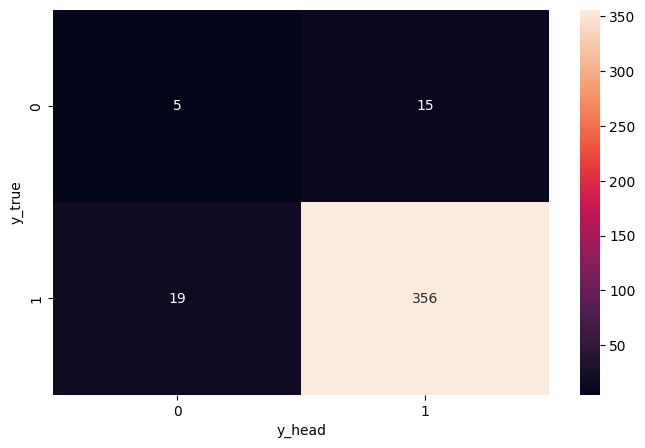

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [31]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import re
data_clean = pd.read_csv('TAClean2.csv', encoding='latin1')
data_clean.head()

,Ulasan,SENTIMEN
0,sesuai gambar bagus,POSITIF
1,barang sesuai pesan manfaat,POSITIF
2,toko amanah hp sesuai deskripsi,POSITIF
3,alhamdulillah tablet ganti cek bagus terima ka...,POSITIF
4,kirim cepat barang fungsi warna sesuai pilih r...,POSITIF


In [32]:
data_clean = data_clean.astype({'SENTIMEN' : 'category'})
data_clean = data_clean.astype({'Ulasan' : 'string'})
data_clean.dtypes

Ulasan      string[python]
SENTIMEN          category
dtype: object

In [33]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['Ulasan'].astype('U'))
print(text_tf)

  (0, 71)	0.39784416191672173
  (0, 320)	0.8281025738363363
  (0, 876)	0.394925499346923
  (1, 563)	0.7966751746822
  (1, 727)	0.4296320302800328
  (1, 97)	0.264982525961549
  (1, 876)	0.3324293090832699
  (2, 234)	0.5661743018117791
  (2, 380)	0.4066940035961517
  (2, 35)	0.46848503645691997
  (2, 996)	0.42865378615454836
  (2, 876)	0.33290291323178156
  (3, 325)	0.398126578552004
  (3, 529)	0.32272699997435217
  (3, 186)	0.152493038370299
  (3, 809)	0.3038836602189331
  (3, 458)	0.14669265360582337
  (3, 970)	0.1421929805227773
  (3, 185)	0.3885361817639921
  (3, 324)	0.4881016302088219
  (3, 942)	0.33029412805628106
  (3, 26)	0.2317331895433447
  (3, 71)	0.16735435097438275
  (4, 685)	0.3036332382180207
  (4, 530)	0.3036332382180207
  :	:
  (654, 970)	0.5151286859995052
  (654, 97)	0.23986379741828448
  (654, 876)	0.30091703654987534
  (655, 294)	0.3703452517454036
  (655, 89)	0.5038216434138417
  (655, 653)	0.20379024652130143
  (655, 689)	0.29012076120357
  (655, 34)	0.20992382008

In [34]:
# Import cosine_similarity metrics
from sklearn.metrics.pairwise import cosine_similarity
# compute similarity using cosine similarity
cos_sim=cosine_similarity(text_tf, text_tf)

print(cos_sim)

[[1.         0.13128481 0.13147185 ... 0.11883981 0.         0.        ]
 [0.13128481 1.         0.11066669 ... 0.16359336 0.         0.04371164]
 [0.13147185 0.11066669 1.         ... 0.10017616 0.339819   0.11422409]
 ...
 [0.11883981 0.16359336 0.10017616 ... 1.         0.29761092 0.21932968]
 [0.         0.         0.339819   ... 0.29761092 1.         0.2473917 ]
 [0.         0.04371164 0.11422409 ... 0.21932968 0.2473917  1.        ]]


In [35]:
#splitting data test 70:30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['SENTIMEN'], test_size=0.7, random_state=33)
print(X_test)
print(y_test)

pos = (y_test == 'POSITIF').sum()
neg = (y_test == 'NEGATIF').sum()
postrain = (y_train == 'POSITIF').sum()
negtrain = (y_train == 'NEGATIF').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data_clean['SENTIMEN'].value_counts()



[[0.         0.         0.339819   ... 0.29761092 1.         0.2473917 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07052512 0.07010445 ... 0.         0.35946634 0.04358027]
 ...
 [0.         0.         0.17229889 ... 0.1384645  0.12452406 0.02598725]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.21167656 0.15575324 0.2895593  ... 0.14098878 0.0383097  0.02337716]]
575    POSITIF
342    POSITIF
337    POSITIF
318    POSITIF
571    POSITIF
        ...   
610    POSITIF
513    POSITIF
483    POSITIF
80     POSITIF
630    POSITIF
Name: SENTIMEN, Length: 460, dtype: category
Categories (2, object): ['NEGATIF', 'POSITIF']
Jumlah data uji dengan sentimen positif: 438
Jumlah data uji dengan sentimen negatif: 22
Jumlah data latih dengan sentimen positif: 186
Jumlah data latih dengan sentimen negatif: 11


SENTIMEN
POSITIF    624
NEGATIF     33
Name: count, dtype: int64

In [36]:
# perform algoritma 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("knn Accuracy:" , accuracy_score(y_test,predicted))
print("knn Precision:" , precision_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("knn Recall:" , recall_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("knn f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="POSITIF"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
print(classification_report(y_test, predicted, zero_division=0))

knn Accuracy: 0.9282608695652174
knn Precision: 0.9571106094808126
knn Recall: 0.9680365296803652
knn f1_score: 0.9625425652667423
confusion matrix:
 [[  3  19]
 [ 14 424]]

              precision    recall  f1-score   support

     NEGATIF       0.18      0.14      0.15        22
     POSITIF       0.96      0.97      0.96       438

    accuracy                           0.93       460
   macro avg       0.57      0.55      0.56       460
weighted avg       0.92      0.93      0.92       460



In [37]:
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
tn, fp, fn, tp

(3, 19, 14, 424)

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
cross_val_score(knn, cos_sim, data_clean['SENTIMEN'], cv=10)

array([0.95454545, 0.89393939, 0.92424242, 0.93939394, 0.93939394,
       0.86363636, 0.93939394, 0.96923077, 0.95384615, 0.96923077])

In [39]:
cross_val_score(knn, cos_sim, data_clean['SENTIMEN'], cv=10).mean()

0.9346853146853148